In [2]:
import warnings
warnings.simplefilter('ignore')

get_ipython().run_line_magic('matplotlib', 'inline')

https://stackoverflow.com/questions/35595766/matplotlib-line-magic-causes-syntaxerror-in-python-script

Line magics are only supported by the IPython command line. They cannot simply be used inside a script, because %something is not correct Python syntax.

行魔术仅由 IPython 命令行支持。 它们不能简单地在脚本中使用，因为% something 不是正确的 Python 语法。

If you want to do this from a script you have to get access to the IPython API and then call the run_line_magic function.

如果您想从脚本中执行此操作，必须获得对 IPython API 的访问权，然后调用运行行魔术函数。

Instead of %matplotlib inline, you will have to do something like this in your script:

代替% matplotlib inline，你必须在你的脚本中做这样的事情:

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# 模型相关包
import statsmodels.api as sm
import statsmodels.stats.diagnostic
# 画图包
import matplotlib.pyplot as plt
# 其他包
import pandas as pd
import numpy as np


In [4]:
fig = plt.figure(figsize=(12,8))
plt.plot(changeXAUUSD,'r',label='XAU USD')
plt.plot(shfeXAU,'g',label='SHFE XAU')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Price')
plt.show()

NameError: name 'changeXAUUSD' is not defined

In [5]:
sd1_closed = pd.read_excel(io = 'D:\lunwen\\sd1_closed.xls')
print (sd1_closed.head(3))
print(type(sd1_closed))



date   closes1   closed1
0 2017-12-26  0.770714 -0.031710
1 2017-12-27 -0.917752  0.113512
2 2017-12-28  0.628920  0.255139
<class 'pandas.core.frame.DataFrame'>


In [6]:
sd1_closed.columns = ['date','closes1','closed1']
sd1_closed['date'] = pd.to_datetime(sd1_closed['date'])
sd1_closed = sd1_closed.set_index('date')
print(sd1_closed['closes1'].head(3))


date
2017-12-26    0.770714
2017-12-27   -0.917752
2017-12-28    0.628920
Name: closes1, dtype: float64


In [7]:
sd1_closed.loc['2018-3-22']

closes1   -0.532526
closed1   -2.934976
Name: 2018-03-22 00:00:00, dtype: float64

In [8]:
sd1_closed['date'].plot

KeyError: 'date'

In [9]:
sd1_closed['closes1'].plot

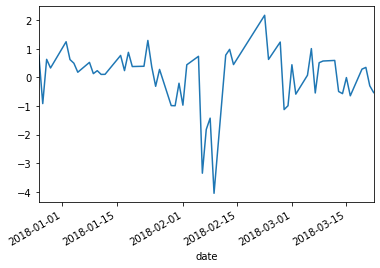

In [10]:
sd1_closed['closes1'].plot()

In [11]:
fig = plt.figure(figsize=(12,8))
plt.plot(sd1_closed['closes1'],'r',label='SHCI')
plt.plot(sd1_closed['closes1'],'g',label='DJIA')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Price')
plt.show()

NameError: name 'correlation' is not defined

In [12]:
fig = plt.figure(figsize=(12,8))
plt.plot(sd1_closed['closes1'],'r',label='SHCI')
plt.plot(sd1_closed['closed1'],'g',label='DJIA')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Price')
plt.show()

NameError: name 'correlation' is not defined

https://blog.csdn.net/mooncrystal123/article/details/86736397

In [13]:
sd1_closed.corr(method ='pearson')

,closes1,closed1
closes1,1.000000,0.043838
closed1,0.043838,1.000000


https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
https://pandas.pydata.org/pandas-docs/version/0.7.3/computation.html

In [14]:
correlation = sd1_closed.corr(method ='pearson')

In [15]:
str(correlation)

'          closes1   closed1\ncloses1  1.000000  0.043838\nclosed1  0.043838  1.000000'

In [16]:
sd1_closed.autocorr(method ='pearson')

AttributeError: 'DataFrame' object has no attribute 'autocorr'

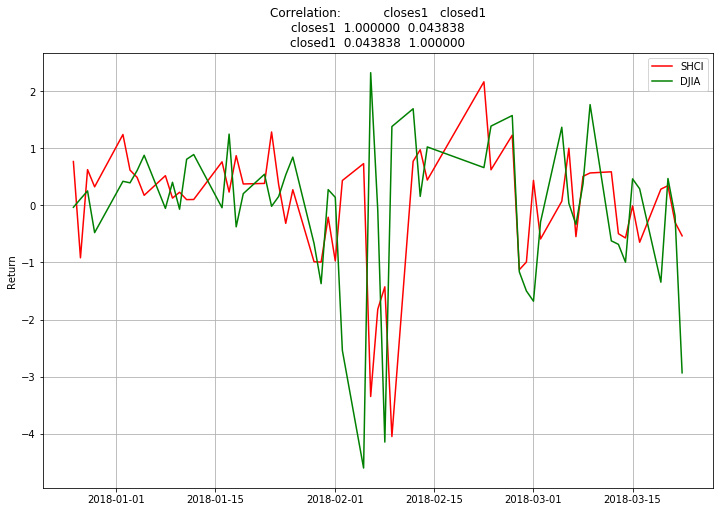

In [17]:
fig = plt.figure(figsize=(12,8))
plt.plot(sd1_closed['closes1'],'r',label='SHCI')
plt.plot(sd1_closed['closed1'],'g',label='DJIA')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return')
plt.show()

In [18]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1','closed1'],maxlags)
output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used",
                                         "Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"],
                                  columns=['value'])
 output['value']['Test Statistic Value'] = adfResult[0]
 output['value']['p-value'] = adfResult[1]
 output['value']['Lags Used'] = adfResult[2]
 output['value']['Number of Observations Used'] = adfResult[3]
 output['value']['Critical Value(1%)'] = adfResult[4]['1%']
 output['value']['Critical Value(5%)'] = adfResult[4]['5%']
 output['value']['Critical Value(10%)'] = adfResult[4]['10%']

IndentationError: unexpected indent (<ipython-input-18-3a2569b5647b>, line 5)

In [19]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1','closed1'],maxlags)
output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"],columns=['value'])
 output['value']['Test Statistic Value'] = adfResult[0]
 output['value']['p-value'] = adfResult[1]
 output['value']['Lags Used'] = adfResult[2]
 output['value']['Number of Observations Used'] = adfResult[3]
 output['value']['Critical Value(1%)'] = adfResult[4]['1%']
 output['value']['Critical Value(5%)'] = adfResult[4]['5%']
 output['value']['Critical Value(10%)'] = adfResult[4]['10%']

IndentationError: unexpected indent (<ipython-input-19-1011aecd376f>, line 3)

In [20]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1','closed1'],maxlags)
output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)", "Critical Value(5%)", "Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = adfResult[0]
output['value']['p-value'] = adfResult[1]
output['value']['Lags Used'] = adfResult[2]
output['value']['Number of Observations Used'] = adfResult[3]
output['value']['Critical Value(1%)'] = adfResult[4]['1%']
output['value']['Critical Value(5%)'] = adfResult[4]['5%']
output['value']['Critical Value(10%)'] = adfResult[4]['10%']

KeyError: ('closes1', 'closed1')

In [21]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1','closed1'],maxlags)

KeyError: ('closes1', 'closed1')

In [22]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1','closed1'],30)

KeyError: ('closes1', 'closed1')

In [23]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1',30)

SyntaxError: invalid syntax (<ipython-input-23-6e24579ad74c>, line 1)

In [24]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1'],30)

ValueError: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors

In [25]:
adfResult = sm.tsa.stattools.adfuller(sd1_closed['closes1'],3)

In [26]:
print (adfResult)

(-4.205563411845501, 0.0006447570639954202, 3, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 142.1598562497805)


In [27]:
from statsmodels.tsa.stattools import adfuller

temp = np.array(data)
t = adfuller(sd1_closed['closes1'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

NameError: name 'data' is not defined

In [28]:
# coding=utf-8
from statsmodels.tsa.stattools import adfuller

temp = np.array(data)
t = adfuller(sd1_closed['closes1'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

NameError: name 'data' is not defined

https://zhuanlan.zhihu.com/p/54985638

In [29]:
# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd1_closed['closes1'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-4.20556
p-value,0.000644757
Lags Used,3
Number of Observations Used,52
Critical Value(1%),-3.56288
Critical Value(5%),-2.91897
Critical Value(10%),-2.59739


In [30]:
# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd1_closed['closed1'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-3.04227
p-value,0.0311315
Lags Used,2
Number of Observations Used,53
Critical Value(1%),-3.56024
Critical Value(5%),-2.91785
Critical Value(10%),-2.5968


In [31]:
result = sm.tsa.stattools.coint(sd1_closed['closes1',sd1_closed['closed1'])

SyntaxError: invalid syntax (<ipython-input-31-4bf69619bd9f>, line 1)

In [32]:
result = sm.tsa.stattools.coint(sd1_closed['closes1'],sd1_closed['closed1'])

In [33]:
print (result)

(-4.242527688745139, 0.0031418990668942875, array([-4.10664876, -3.44947826, -3.1224619 ]))


In [34]:
md = sm.tsa.VAR(sd1_closed['closes1'],sd1_closed['closed1'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Only gave one variable to VAR

In [35]:
md = sm.tsa.VAR(sd1_closed['closes1','closed1'])

KeyError: ('closes1', 'closed1')

In [36]:
model. sm. tsa. VARMAx(sd1_closed, order=(1, 0), trend='c')
model result- model fit(maxiter 1000, disp=False)
print(model result summary())

SyntaxError: invalid syntax (<ipython-input-36-3df4eb183f64>, line 2)

In [37]:
model = sm.tsa.VARMAx(sd1_closed, order=(1, 0), trend='c')
model result = model fit(maxiter 1000, disp=False)
print(model result summary())

SyntaxError: invalid syntax (<ipython-input-37-04c3b2342347>, line 2)

In [38]:
model = sm.tsa.VARMAx(sd1_closed, order=(1, 0), trend='c')
model result = model.fit(maxiter 1000, disp=False)
print(model result summary())

SyntaxError: invalid syntax (<ipython-input-38-6efe5b3708b6>, line 2)

In [39]:
model = sm.tsa.VARMAx(sd1_closed, order = (1, 0), trend = 'c')
model result = model.fit(maxiter = 1000, disp = False)
print(model result summary())

SyntaxError: invalid syntax (<ipython-input-39-c709bf5b8001>, line 2)

In [40]:
model = sm.tsa.VARMAx(sd1_closed, order = (1, 0), trend = 'c')
model_result = model.fit(maxiter = 1000, disp = False)
print(model_result summary())

SyntaxError: invalid syntax (<ipython-input-40-5b5aebda782a>, line 3)

In [41]:
model = sm.tsa.VARMAx(sd1_closed, order = (1, 0), trend = 'c')
model_result = model.fit(maxiter = 1000, disp = False)
print(model_result.summary())

AttributeError: module 'statsmodels.tsa.api' has no attribute 'VARMAx'

In [42]:
model1 = sm.tsa.VARMAX(sd1_closed, order = (1, 0), trend = 'c')
fitmod1 = model1.fit(maxiter = 1000, disp = False)
print(fitmod1.summary())

Statespace Model Results                             
Dep. Variable:     ['closes1', 'closed1']   No. Observations:                   56
Model:                             VAR(1)   Log Likelihood                -162.432
                              + intercept   AIC                            342.864
Date:                    Thu, 23 Apr 2020   BIC                            361.092
Time:                            15:28:11   HQIC                           349.931
Sample:                                 0                                         
                                     - 56                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                31.76, 47.08   Jarque-Bera (JB):          2.53, 25.03
Prob(Q):                        0.82, 0.21   Prob(JB):                   0.28, 0.00
Heteroskedasticity (H):         1.95, 5.26   Skew:                     -0.48, -1.12
Prob(H) (two-sided):          

https://towardsdatascience.com/prediction-task-with-multivariate-timeseries-and-var-model-47003f629f9
https://www.youtube.com/watch?v=_vQ0W_qXMxk 20:24


#建立对象，dataframe就是前面的data，varLagNum就是你自己定的滞后阶数
orgMod = sm.tsa.VARMAX(dataframe,order=(varLagNum,0),trend='nc',exog=None)

In [43]:
f = open('D:\lunwen\VAR_1.csv','w')
f.write(fitmod1.summary().as_csv())
f.close()

In [44]:
resid = fitmod.resid
result = {'fitmod':fitmod,'resid':resid}

NameError: name 'fitmod' is not defined

获得模型残差

In [45]:
print (result)

(-4.242527688745139, 0.0031418990668942875, array([-4.10664876, -3.44947826, -3.1224619 ]))


In [46]:
result = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid)

NameError: name 'resid' is not defined

In [47]:

result = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid)

NameError: name 'resid' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
FEVD for closes1
      closes1   closed1
0    1.000000  0.000000
1    0.745182  0.254818
2    0.739411  0.260589
3    0.744016  0.255984
4    0.743648  0.256352
5    0.737847  0.262153
6    0.738385  0.261615
7    0.738214  0.261786
8    0.738021  0.261979
9    0.737899  0.262101

FEVD for closed1
      closes1   closed1
0    0.000907  0.999093
1    0.128375  0.871625
2    0.164574  0.835426
3    0.163839  0.836161
4    0.160344  0.839656
5    0.164367  0.835633
6    0.164387  0.835613
7    0.164366  0.835634
8    0.164365  0.835635
9    0.164458  0.835542


None


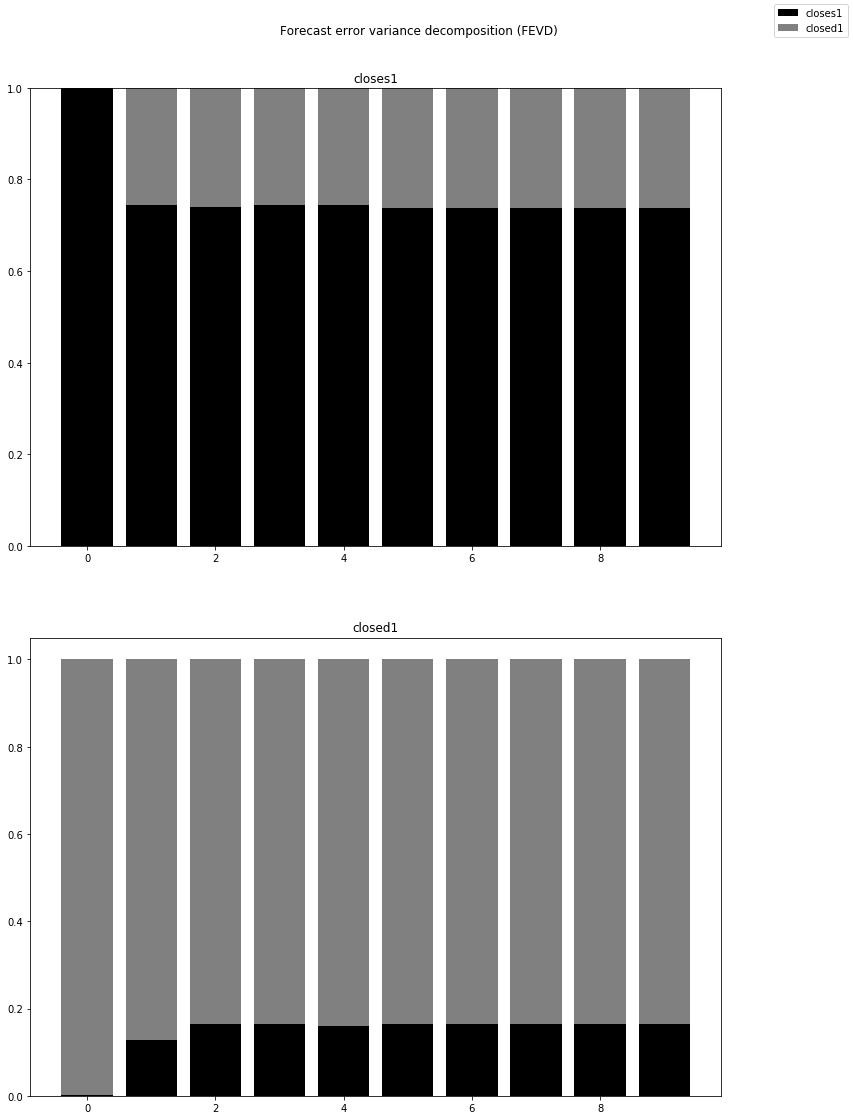

In [48]:
md = sm.tsa.VAR(sd1_closed)
re = md.fit(2)
fevd = re.fevd(10)
# 打印出方差分解的结果
print(fevd.summary())
# 画图
fevd.plot(figsize=(12, 16))
plt.show()

方差分解图

In [49]:
ax = fitmod.impulse_responses(terms, orthogonalized=True).plot(figsize=(12, 8))
plt.show()

NameError: name 'fitmod' is not defined

7）脉冲响应图
orthogonalized=True代表使用乔里斯基正交，这里很奇葩，官方文档没有加plt.show(),但是博主亲身试验，一定要加，不然画不出来。terms代表周期数。

In [50]:
ax = fitmod.impulse_responses(5, orthogonalized=True).plot(figsize=(12, 8))
plt.show()

NameError: name 'fitmod' is not defined

In [51]:
result1 = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid[1])
print (result1)

NameError: name 'resid' is not defined

In [52]:
results1 = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid['closes1'])

NameError: name 'resid' is not defined

6）系数平稳检验：CUSUM检验
这里也注意，Python这里不像EVIEWS，python没有办法算AR根，弄不到AR根图，但是python可以进行cusum检验。返回3各变量，第2个是P-value值，记得我之前说的吗，cusum检验要无法拒绝原假设，也就是说P-value值要大于0.05

这里的resid就是前面模型的resid

In [53]:
print (results1)

NameError: name 'results1' is not defined

In [54]:
resultd1 = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid['closed1'])

NameError: name 'resid' is not defined

In [55]:
print (resultd1)

NameError: name 'resultd1' is not defined

In [56]:
sd2_closed = pd.read_excel(io = 'D:\lunwen\\sd2_closed.xls')
sd2_closed.columns = ['date','closes2','closed2']
sd2_closed['date'] = pd.to_datetime(sd2_closed['date'])
sd2_closed = sd2_closed.set_index('date')
print(sd2_closed['closes2'].head(3))

date
2018-03-23   -3.392667
2018-03-26   -0.603885
2018-03-27    1.050731
Name: closes2, dtype: float64


In [57]:
sd2_closed.corr(method ='pearson')sd2_closed.corr(method ='pearson')
correlation = sd2_closed.corr(method ='pearson')
fig = plt.figure(figsize=(12,8))
plt.plot(sd2_closed['closes2'],'r',label='SHCI')
plt.plot(sd2_closed['closed2'],'g',label='DJIA')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Price')
plt.show()

SyntaxError: invalid syntax (<ipython-input-57-a36cc50132fa>, line 1)

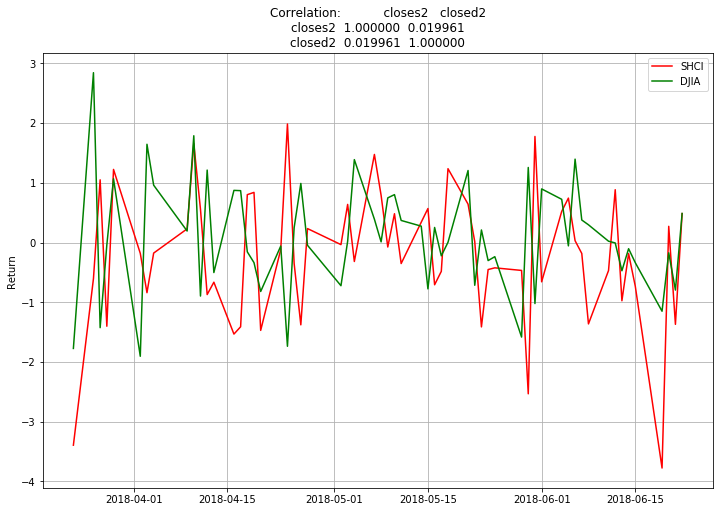

In [58]:
sd2_closed.corr(method ='pearson')
correlation = sd2_closed.corr(method ='pearson')
fig = plt.figure(figsize=(12,8))
plt.plot(sd2_closed['closes2'],'r',label='SHCI')
plt.plot(sd2_closed['closed2'],'g',label='DJIA')
plt.title('Correlation: ' + str(correlation))
plt.grid(True)
plt.axis('tight')
plt.legend(loc=0)
plt.ylabel('Return')
plt.show()

In [59]:
adfResult = sm.tsa.stattools.adfuller(sd2_closed['closes2'],3)
print (adfResult)

# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd2_closed['closes2'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(2%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(20%)'] = t[4]['20%']
output

# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd2_closed['closed2'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(2%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(20%)'] = t[4]['20%']
output

(-8.44971061733133, 1.6752012101963112e-13, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 165.1806200809679)


KeyError: '20%'

In [60]:
adfResult = sm.tsa.stattools.adfuller(sd2_closed['closes2'],3)
print (adfResult)

# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd2_closed['closes2'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(2%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(20%)'] = t[4]['10%']
output

# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd2_closed['closed2'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(2%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(20%)'] = t[4]['10%']
output

(-8.44971061733133, 1.6752012101963112e-13, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 165.1806200809679)


,value
Test Statistic Value,-11.1554
p-value,2.87427e-20
Lags Used,0
Number of Observations Used,58
Critical Value(1%),NaN
Critical Value(5%),NaN
Critical Value(10%),NaN


In [61]:
adfResult = sm.tsa.stattools.adfuller(sd2_closed['closes2'],3)
print (adfResult)

# coding=utf-8
from statsmodels.tsa.stattools import adfuller

t = adfuller(sd2_closed['closes2'])  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(2%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(20%)'] = t[4]['10%']
output

(-8.44971061733133, 1.6752012101963112e-13, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 165.1806200809679)


,value
Test Statistic Value,-8.44971
p-value,1.6752e-13
Lags Used,0
Number of Observations Used,58
Critical Value(1%),NaN
Critical Value(5%),NaN
Critical Value(10%),NaN


In [62]:
# TODO

In [63]:
model = sm.tsa.VARMAX(sd2_closed, order = (1, 0), trend = 'c')
fitmod = model.fit(maxiter = 1000, disp = False)
print(model_result.summary())

resid = fitmod.resid
result = {'fitmod':fitmod,'resid':resid}

print (result)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


NameError: name 'model_result' is not defined

In [64]:
print(fitmod.summary())

Statespace Model Results                             
Dep. Variable:     ['closes2', 'closed2']   No. Observations:                   59
Model:                             VAR(1)   Log Likelihood                -161.117
                              + intercept   AIC                            340.235
Date:                    Thu, 23 Apr 2020   BIC                            358.933
Time:                            15:28:15   HQIC                           347.534
Sample:                                 0                                         
                                     - 59                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                22.47, 55.29   Jarque-Bera (JB):          10.69, 0.51
Prob(Q):                        0.99, 0.05   Prob(JB):                   0.00, 0.78
Heteroskedasticity (H):         0.84, 0.54   Skew:                     -0.74, -0.11
Prob(H) (two-sided):          

In [65]:
fitmod.summary.toexcel(D:\lunwen\VAR_2.xls)

SyntaxError: invalid syntax (<ipython-input-65-c0216f009bfc>, line 1)

In [66]:
f = open('D:\lunwen\VAR_2.csv','w')
f.write(fitmod.summary().as_csv())
f.close()

https://stackoverflow.com/questions/16705598/python-2-7-statsmodels-formatting-and-writing-summary-output

In [67]:
f = open('D:\lunwen\VAR_2.xls','w')
f.write(fitmod.summary().as_xls())
f.close()

AttributeError: 'Summary' object has no attribute 'as_xls'

In [68]:
resid = fitmod.resid
result = {'fitmod':fitmod,'resid':resid}

print (result)

{'fitmod': <statsmodels.tsa.statespace.varmax.VARMAXResultsWrapper object at 0x00000201E2BA6888>, 'resid':              closes2   closed2
date                          
2018-03-23 -3.200841 -1.860092
2018-03-26  0.189585  1.847967
2018-03-27 -0.027966 -0.653519
2018-03-28 -0.437353 -0.501246
2018-03-29  1.384645  0.824809
2018-04-02 -0.325646 -1.537853
2018-04-03  0.249280  0.910990
2018-04-04 -0.732866  1.319748
2018-04-09  0.029452  0.392176
2018-04-10  1.832842  1.775704
2018-04-11  0.119090 -0.253515
2018-04-12 -0.181495  0.877136
2018-04-13 -1.028371 -0.286912
2018-04-16 -1.109871  0.549838
2018-04-17 -1.670179  0.910951
2018-04-18  0.552884 -0.103775
2018-04-19  1.214455 -0.408506
2018-04-20 -1.012077 -0.946369
2018-04-23  0.390620 -0.561961
2018-04-24  2.248496 -1.864130
2018-04-25  0.822208 -0.226702
2018-04-26 -1.269558  0.940363
2018-04-27 -0.067212  0.048471
2018-05-02  0.248847 -0.812790
2018-05-03  1.206441 -0.314625
2018-05-04 -0.034431  1.358696
2018-05-07  1.072816  0.7

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
FEVD for closes2
      closes2   closed2
0    1.000000  0.000000
1    0.899000  0.101000
2    0.897274  0.102726
3    0.898291  0.101709
4    0.897455  0.102545
5    0.897424  0.102576
6    0.897407  0.102593
7    0.897402  0.102598
8    0.897402  0.102598
9    0.897401  0.102599

FEVD for closed2
      closes2   closed2
0    0.004819  0.995181
1    0.005045  0.994955
2    0.139213  0.860787
3    0.144365  0.855635
4    0.145697  0.854303
5    0.146548  0.853452
6    0.146628  0.853372
7    0.146683  0.853317
8    0.146687  0.853313
9    0.146688  0.853312


None


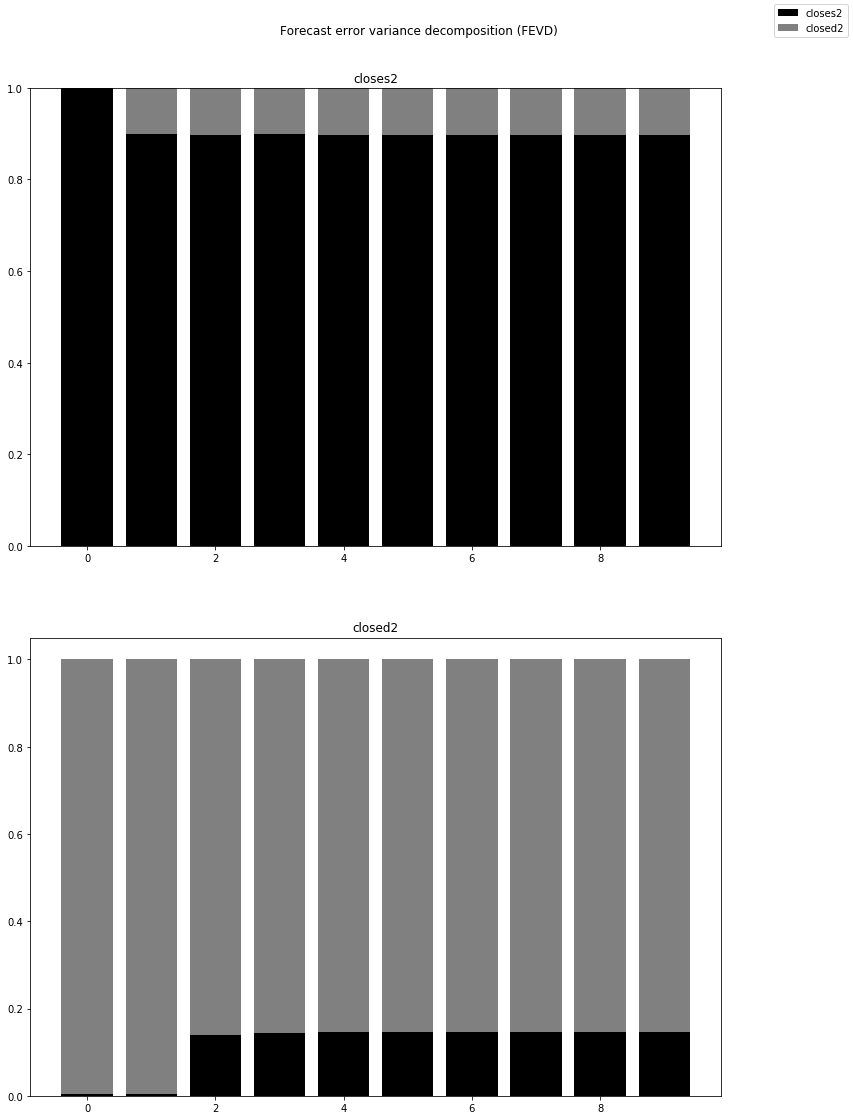

In [69]:
md = sm.tsa.VAR(sd2_closed)
re = md.fit(2)
fevd = re.fevd(10)
# 打印出方差分解的结果
print(fevd.summary())
# 画图
fevd.plot(figsize=(12, 16))
plt.show()

In [70]:
results2 = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid['closes2'])
print (results2)
resultd2 = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid['closed2'])
print (resultd2)

(0.6116246067565362, 0.8485262508403353, [(1, 1.63), (5, 1.36), (10, 1.22)])
(0.7788505935493297, 0.5789036097218997, [(1, 1.63), (5, 1.36), (10, 1.22)])
